In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

# 1. Explain the dataset

In [59]:
df = pd.read_csv("Advertising.csv")
df.set_index('Unnamed: 0',inplace=True)
df.head()

,TV,Radio,Newspaper,Sales
Unnamed: 0,,,,
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


# 2. Check the summary statistics and discuss the max, min, avg, median,
and percentiles

In [17]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# 3. Draw a scatter plot between TV and sales and write your insights

Text(0, 0.5, 'Sales')

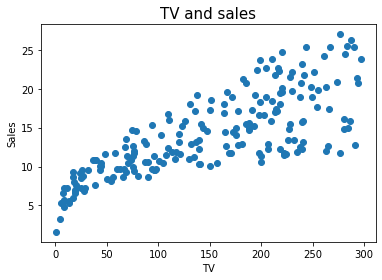

In [7]:
plt.scatter(df['TV'], df['Sales'])
plt.title('TV and sales', fontsize=15)
plt.xlabel('TV')
plt.ylabel('Sales')

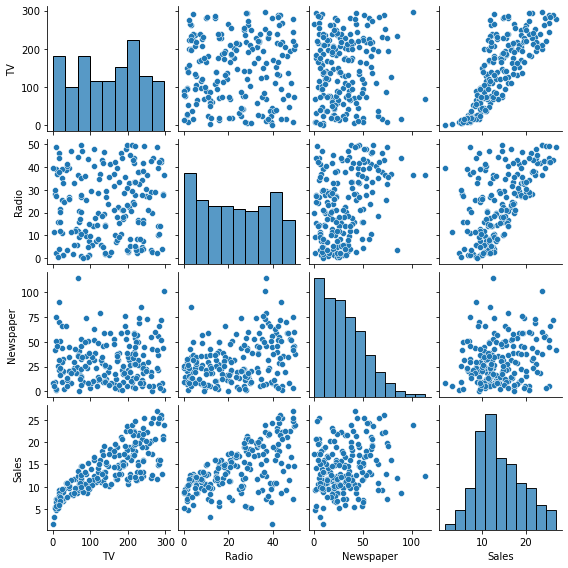

In [26]:
df_pairplot=df.dropna()
df_pairplot.to_csv('Advertising.csv')
sns.pairplot(df_pairplot, height=2)

In [27]:
#sns.pairplot(df)

# 4. Do a correlation analysis on the data set

In [18]:
df.cov()

,TV,Radio,Newspaper,Sales
TV,7370.949893,69.862492,105.919452,350.390195
Radio,69.862492,220.427743,114.496979,44.635688
Newspaper,105.919452,114.496979,474.308326,25.941392
Sales,350.390195,44.635688,25.941392,27.221853


In [19]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [22]:
#df.corr(method='pearson')

<AxesSubplot:>

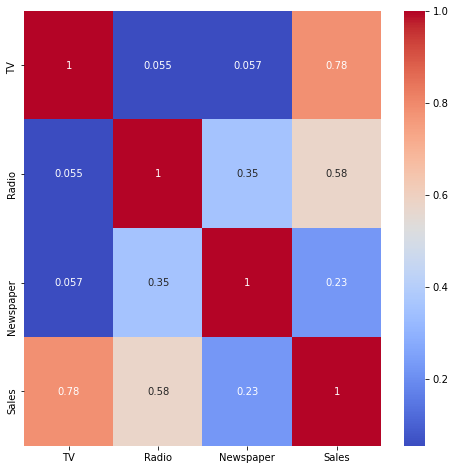

In [23]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

# 5. Fit a linear regression model on the dataset

In [41]:
x=df.drop(['Sales'],axis=1).values
y=df['Sales'].values

In [42]:
print(x)

[[230.1  37.8  69.2]
 [ 44.5  39.3  45.1]
 [ 17.2  45.9  69.3]
 [151.5  41.3  58.5]
 [180.8  10.8  58.4]
 [  8.7  48.9  75. ]
 [ 57.5  32.8  23.5]
 [120.2  19.6  11.6]
 [  8.6   2.1   1. ]
 [199.8   2.6  21.2]
 [ 66.1   5.8  24.2]
 [214.7  24.    4. ]
 [ 23.8  35.1  65.9]
 [ 97.5   7.6   7.2]
 [204.1  32.9  46. ]
 [195.4  47.7  52.9]
 [ 67.8  36.6 114. ]
 [281.4  39.6  55.8]
 [ 69.2  20.5  18.3]
 [147.3  23.9  19.1]
 [218.4  27.7  53.4]
 [237.4   5.1  23.5]
 [ 13.2  15.9  49.6]
 [228.3  16.9  26.2]
 [ 62.3  12.6  18.3]
 [262.9   3.5  19.5]
 [142.9  29.3  12.6]
 [240.1  16.7  22.9]
 [248.8  27.1  22.9]
 [ 70.6  16.   40.8]
 [292.9  28.3  43.2]
 [112.9  17.4  38.6]
 [ 97.2   1.5  30. ]
 [265.6  20.    0.3]
 [ 95.7   1.4   7.4]
 [290.7   4.1   8.5]
 [266.9  43.8   5. ]
 [ 74.7  49.4  45.7]
 [ 43.1  26.7  35.1]
 [228.   37.7  32. ]
 [202.5  22.3  31.6]
 [177.   33.4  38.7]
 [293.6  27.7   1.8]
 [206.9   8.4  26.4]
 [ 25.1  25.7  43.3]
 [175.1  22.5  31.5]
 [ 89.7   9.9  35.7]
 [239.9  41.5

In [43]:
print(y)

[22.1 10.4  9.3 18.5 12.9  7.2 11.8 13.2  4.8 10.6  8.6 17.4  9.2  9.7
 19.  22.4 12.5 24.4 11.3 14.6 18.  12.5  5.6 15.5  9.7 12.  15.  15.9
 18.9 10.5 21.4 11.9  9.6 17.4  9.5 12.8 25.4 14.7 10.1 21.5 16.6 17.1
 20.7 12.9  8.5 14.9 10.6 23.2 14.8  9.7 11.4 10.7 22.6 21.2 20.2 23.7
  5.5 13.2 23.8 18.4  8.1 24.2 15.7 14.  18.   9.3  9.5 13.4 18.9 22.3
 18.3 12.4  8.8 11.  17.   8.7  6.9 14.2  5.3 11.  11.8 12.3 11.3 13.6
 21.7 15.2 12.  16.  12.9 16.7 11.2  7.3 19.4 22.2 11.5 16.9 11.7 15.5
 25.4 17.2 11.7 23.8 14.8 14.7 20.7 19.2  7.2  8.7  5.3 19.8 13.4 21.8
 14.1 15.9 14.6 12.6 12.2  9.4 15.9  6.6 15.5  7.  11.6 15.2 19.7 10.6
  6.6  8.8 24.7  9.7  1.6 12.7  5.7 19.6 10.8 11.6  9.5 20.8  9.6 20.7
 10.9 19.2 20.1 10.4 11.4 10.3 13.2 25.4 10.9 10.1 16.1 11.6 16.6 19.
 15.6  3.2 15.3 10.1  7.3 12.9 14.4 13.3 14.9 18.  11.9 11.9  8.  12.2
 17.1 15.   8.4 14.5  7.6 11.7 11.5 27.  20.2 11.7 11.8 12.6 10.5 12.2
  8.7 26.2 17.6 22.6 10.3 17.3 15.9  6.7 10.8  9.9  5.9 19.6 17.3  7.6
  9.7 1

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [46]:
from sklearn.linear_model import LinearRegression
ml=LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

In [47]:
y_pred=ml.predict(x_test)
print(y_pred)

[10.05866652  7.43318827  6.95305695 24.16874598 11.98172029  6.54464708
 13.19426793 14.90240334 11.07675294 16.25061663 23.0081158   9.12072148
 10.29342297 15.3709661  11.62396513 12.1057432  18.55030805 10.85810888
 16.13879856 17.20281404 24.25469939  9.43869821 15.13419408 12.41283844
  5.66973859 15.23876681 12.1878762  20.95164149 13.22671807  9.20954724
 13.39812727 21.61944517 18.05938674 21.14798547  6.73582996  6.16799717
  7.98042607 13.09083488 14.86214078  6.23597127 12.35246911  9.19452235
 15.04717679 16.23039254 17.17240889 13.3341216   3.68035786 12.53946851
 15.93674769  8.67881357 10.62459997 19.5646526  18.3472282  15.24662975
 10.04846378  8.17344188 21.49061088 14.137309   16.29760212  8.90502274]


In [48]:
ml.predict([[230.1,37.8,69.2]])

array([20.68332127])

In [54]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8649018906637791

Text(0.5, 1.0, 'actual vs predicted')

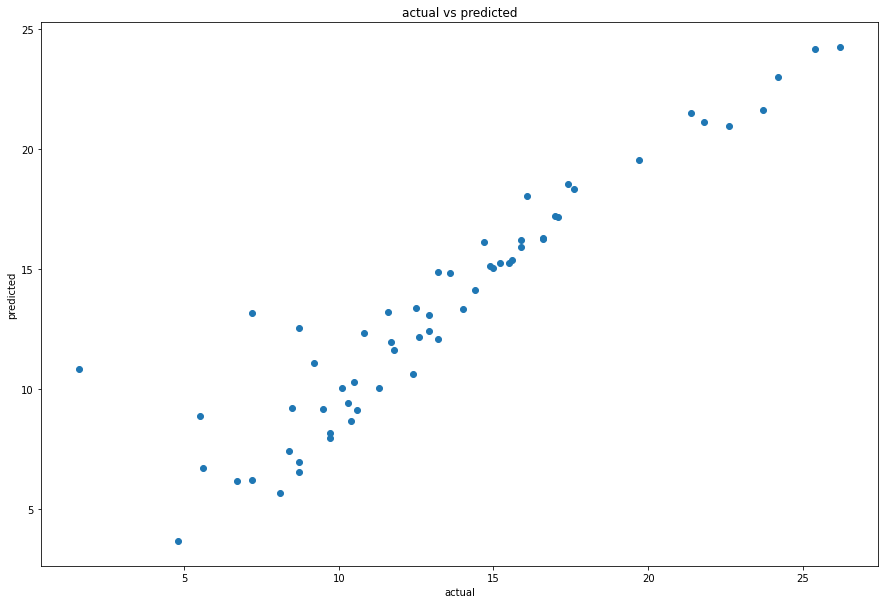

In [63]:
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('actual vs predicted')

In [58]:
pred_y_df=pd.DataFrame({'actual values':y_test,'predicted values':y_pred,'difference':y_test-y_pred})
pred_y_df[0:20]

,actual values,predicted values,difference
0,11.3,10.058667,1.241333
1,8.4,7.433188,0.966812
2,8.7,6.953057,1.746943
3,25.4,24.168746,1.231254
4,11.7,11.981720,-0.281720
5,8.7,6.544647,2.155353
6,7.2,13.194268,-5.994268
7,13.2,14.902403,-1.702403
8,9.2,11.076753,-1.876753
9,16.6,16.250617,0.349383


In [53]:
#reg=linear_model.LinearRegression()
#reg.fit(df[['TV','Radio','Newspaper']],df.Sales)

In [49]:
#reg.coef_

In [50]:
#reg.intercept_

In [51]:
#reg.predict([[200,30,60]])